# Objective
## Predict whether a Patient will have stroke or not based on some given attributes. Evaluation metric was AUC-ROC Score.

### Import modules and data for notebook.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read and Show Dictionary Image

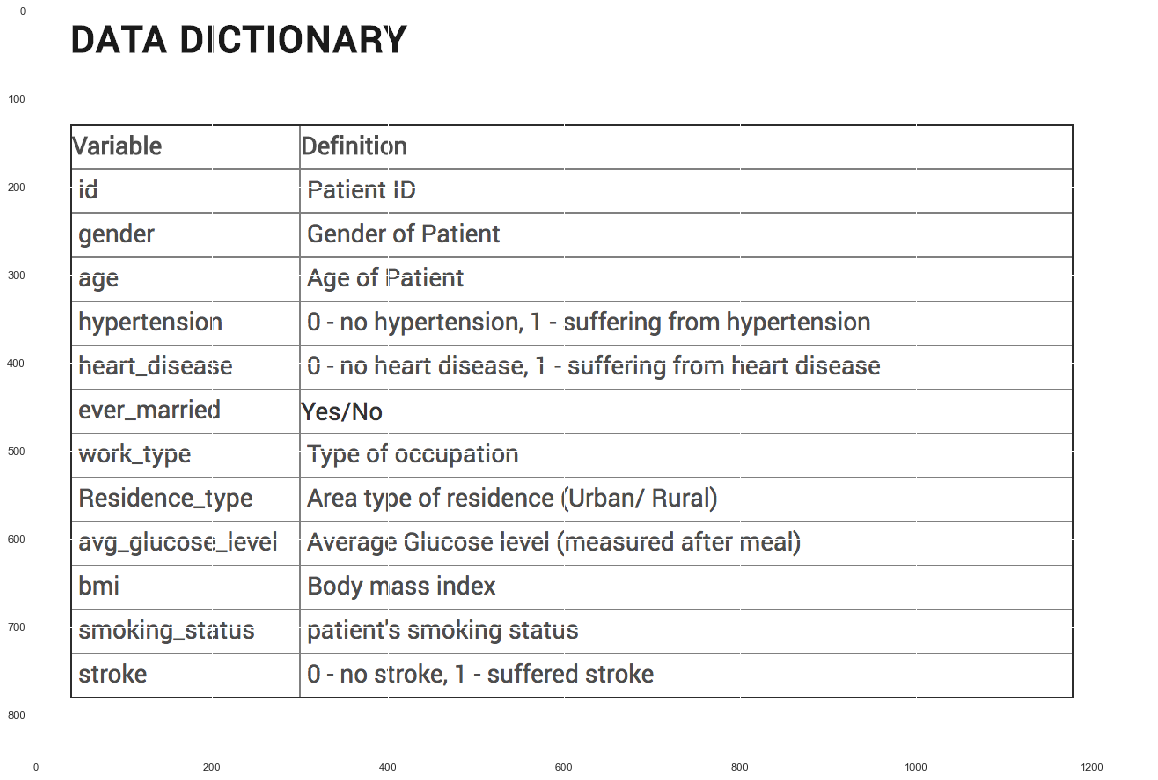

In [2]:
img = mpimg.imread('Screen Shot 2018-04-17 at 12.15.42 AM.png') 
  
# Output Images 
plt.figure(figsize = (20,20))
plt.imshow(img, interpolation='nearest')

## Understanding Data
Here is the Definitions of the columns of the data

1. id-Patient ID
2. gender-Gender of Patient
3. age-Age of Patient
4. hypertension-0 - no hypertension, 1 - suffering from hypertension
5. heart_disease-0 - no heart disease, 1 - suffering from heart disease
6. ever_married-Yes/No
7. work_type-Type of occupation
8. Residence_type-Area type of residence (Urban/ Rural)
9. avg_glucose_level-Average Glucose level (measured after meal)
10. bmi-Body mass index
11. smoking_status-patient’s smoking status
12. stroke-0 - no stroke, 1 - suffered stroke

### Read in test and train data into respective dataframes.

In [3]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
print('TRAIN:')
display(train)
print('TEST:')
display(test)

TRAIN:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


TEST:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
5,9348,Female,66.0,1,0,Yes,Private,Urban,219.98,32.2,never smoked
6,51550,Female,49.0,0,0,Yes,Self-employed,Rural,74.03,25.1,NaN
7,60512,Male,46.0,0,0,Yes,Govt_job,Urban,120.80,32.5,never smoked
8,31309,Female,75.0,0,0,Yes,Self-employed,Rural,78.71,28.0,never smoked
9,39199,Male,75.0,0,0,Yes,Self-employed,Urban,77.20,25.7,smokes


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### 13292/43400 = 30.6% of smoking status missing in train data.
### 1462/43400 = 3.4% of bmi missing in train data.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 11 columns):
id                   18601 non-null int64
gender               18601 non-null object
age                  18601 non-null float64
hypertension         18601 non-null int64
heart_disease        18601 non-null int64
ever_married         18601 non-null object
work_type            18601 non-null object
Residence_type       18601 non-null object
avg_glucose_level    18601 non-null float64
bmi                  18010 non-null float64
smoking_status       12850 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 1.6+ MB


In [7]:
test.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

### 5751/18601 = 30.9% of smoking status missing from test data.
### 591/18601 = 3.2% of bmi missing from test data.

## Since over 30% of the data is missing for smoking status, we will drop that column.

## Only 3% of the bmi data is missing. I could fill those with the mean or median, but it's such an important value and I have plenty of data that I am going to instead drop those rows.

## Also drop the id column.

In [8]:
train_df = train.drop(columns=['id','smoking_status'])
train_df.dropna(subset=['bmi'], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41938 entries, 0 to 43399
Data columns (total 10 columns):
gender               41938 non-null object
age                  41938 non-null float64
hypertension         41938 non-null int64
heart_disease        41938 non-null int64
ever_married         41938 non-null object
work_type            41938 non-null object
Residence_type       41938 non-null object
avg_glucose_level    41938 non-null float64
bmi                  41938 non-null float64
stroke               41938 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 3.5+ MB


## And do the same for the test data while we're at it.

In [9]:
test_df = test.drop(columns=['id','smoking_status'])
test_df.dropna(subset=['bmi'], inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18010 entries, 0 to 18600
Data columns (total 9 columns):
gender               18010 non-null object
age                  18010 non-null float64
hypertension         18010 non-null int64
heart_disease        18010 non-null int64
ever_married         18010 non-null object
work_type            18010 non-null object
Residence_type       18010 non-null object
avg_glucose_level    18010 non-null float64
bmi                  18010 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.4+ MB


## All NaNs gone. Let's look at the distribution of the train data in each column.

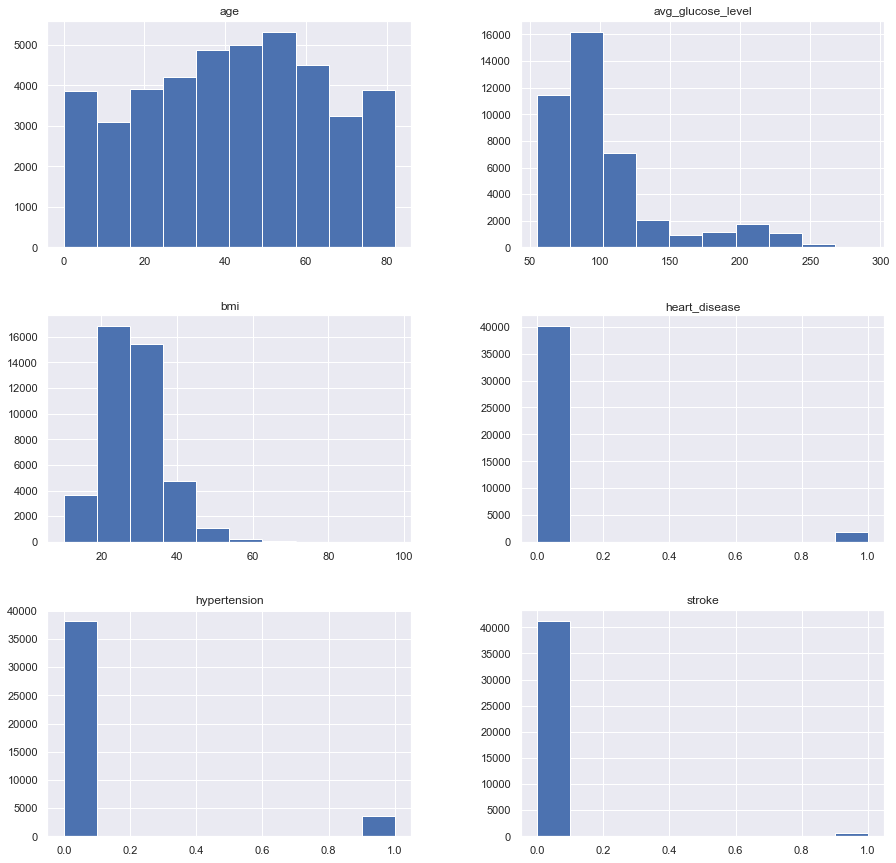

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train_df.hist(ax=ax)
plt.show()

## Stroke, heart disease, and hypertension data look very imbalanced, but my main concern is my target data, stroke.

In [11]:
train_df.stroke.value_counts()

0    41295
1      643
Name: stroke, dtype: int64

## Indeed, there are 41,295 stroke patients and only 643 non-stroke patients. I am concerned that a ML algorithm will predict no stroke for all data. First, we need to encode the categorical data.

In [12]:
encoded_train = train_df.copy()

encoder = LabelEncoder()
encoder.fit(train_df.gender)
encoded_train.gender = encoder.transform(train_df.gender)

encoder.fit(train_df.ever_married)
encoded_train.ever_married = encoder.transform(train_df.ever_married)

encoder.fit(train_df.work_type)
encoded_train.work_type = encoder.transform(train_df.work_type)

encoder.fit(train_df.Residence_type)
encoded_train.Residence_type = encoder.transform(train_df.Residence_type)

display(encoded_train)
encoded_train.info()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,3.00,0,0,0,4,0,95.12,18.0,0
1,1,58.00,1,0,1,2,1,87.96,39.2,0
2,0,8.00,0,0,0,2,1,110.89,17.6,0
3,0,70.00,0,0,1,2,0,69.04,35.9,0
4,1,14.00,0,0,0,1,0,161.28,19.1,0
5,0,47.00,0,0,1,2,1,210.95,50.1,0
6,0,52.00,0,0,1,2,1,77.59,17.7,0
7,0,75.00,0,1,1,3,0,243.53,27.0,0
8,0,32.00,0,0,1,2,0,77.67,32.3,0
9,0,74.00,1,0,1,3,1,205.84,54.6,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41938 entries, 0 to 43399
Data columns (total 10 columns):
gender               41938 non-null int64
age                  41938 non-null float64
hypertension         41938 non-null int64
heart_disease        41938 non-null int64
ever_married         41938 non-null int64
work_type            41938 non-null int64
Residence_type       41938 non-null int64
avg_glucose_level    41938 non-null float64
bmi                  41938 non-null float64
stroke               41938 non-null int64
dtypes: float64(3), int64(7)
memory usage: 3.5 MB


## Now I will oversample the stroke observations, but only on the training data so I don't bias my test data.

## Since the original "test" data given has no stroke data, I will split the given "train" data into a train and test set.

In [13]:
training_features, test_features, \
training_target, test_target, = train_test_split(encoded_train.drop(['stroke'], axis=1),
                                                 encoded_train['stroke'],
                                                 test_size = .1,
                                                 random_state=12)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

## What is the proportion of non-stroke (0) and stroke (1) observations?

In [15]:
y_train.value_counts()

0    33462
1      507
Name: stroke, dtype: int64

## Use SMOTE to create synthetic data to balance the sample.
### SMOTE = Synthetic Minority Over-sampling Technique

In [16]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

## NOW what is the proportion of non-stroke (0) and stroke (1) observations?

In [17]:
unique, counts = np.unique(y_train_res, return_counts=True)
dict(zip(unique, counts))

{0: 33462, 1: 33462}

## There are exactly the same number of stroke and non-stroke observations in y_train_res.

## By oversampling only on the training data, none of the information in the validation data is being used to create synthetic observations. So these results should be generalizable. Let’s see if that’s true.

The following code was supposed to confirm the results were generalizable, but it yielded a recall of 0... so something is wrong. I commented out this code for later analysis. 

In [18]:
# clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
# clf_rf.fit(x_train_res, y_train_res)

In [19]:
# print('Validation Results')
# print(clf_rf.score(x_test, y_test))
# print(recall_score(y_test, clf_rf.predict(x_test)))
# print('\nTest Results')
# print(clf_rf.score(test_features, test_target))
# print(recall_score(test_target, clf_rf.predict(test_features)))

# I switched to trying logistic regression...

# Need to change x_train_res and y_train_res, which are numpy arrays with the oversampled observations, back into a dataframe.

In [20]:
log_df = pd.DataFrame(data=x_train_res,    # values
             index= list(range(0,len(x_train_res))),    # index
             columns= encoded_train.drop(columns='stroke').columns)  # columns of encoded_train as the column names
log_df['stroke'] = y_train_res
display(log_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1.000000,74.000000,0.000000,0.000000,1.00000,3.000000,1.000000,60.580000,33.400000,0
1,0.000000,82.000000,0.000000,0.000000,1.00000,3.000000,1.000000,70.780000,17.600000,0
2,0.000000,44.000000,0.000000,0.000000,1.00000,2.000000,0.000000,89.090000,36.400000,0
3,0.000000,13.000000,0.000000,0.000000,0.00000,4.000000,0.000000,84.670000,17.200000,0
4,1.000000,53.000000,0.000000,0.000000,1.00000,2.000000,0.000000,188.170000,29.300000,0
5,0.000000,50.000000,0.000000,0.000000,1.00000,3.000000,0.000000,126.850000,49.500000,0
6,1.000000,69.000000,0.000000,0.000000,1.00000,2.000000,0.000000,76.150000,34.200000,0
7,1.000000,78.000000,0.000000,0.000000,1.00000,2.000000,0.000000,214.790000,22.200000,0
8,1.000000,8.000000,0.000000,0.000000,0.00000,4.000000,1.000000,88.490000,22.700000,0
9,0.000000,15.000000,0.000000,0.000000,0.00000,4.000000,0.000000,96.230000,21.400000,0


## logistic regression is very sensitive to correlated features, so let's check that first.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

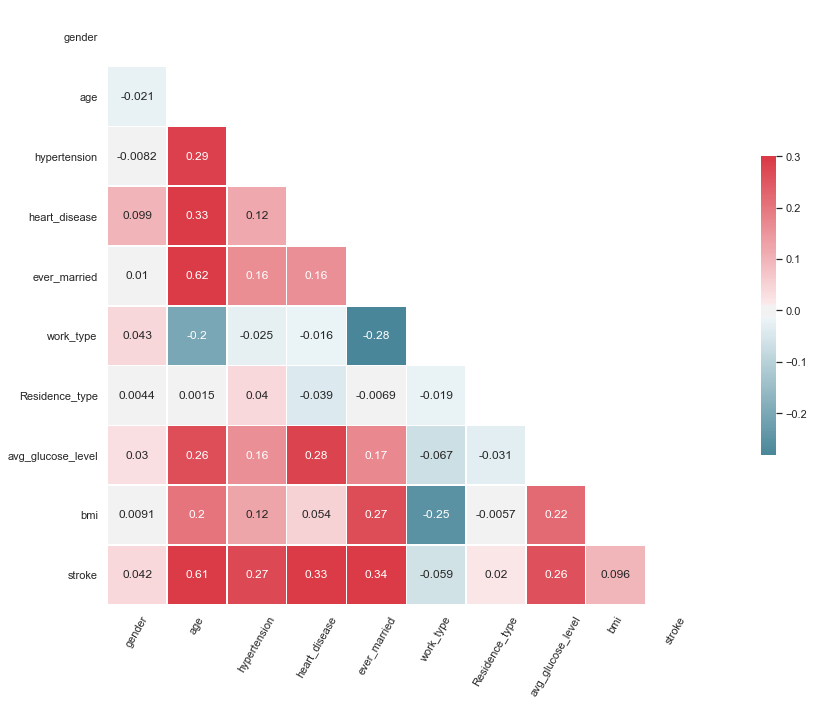

In [21]:
# Set the background to white so it won't show after adding the mask.
sns.set(style="white")

# Compute the correlation matrix from train_df.
corr = log_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=60)

## Ever_married and age have a .62 correlation, so we shouldn't use both of them. The rest range between .33 and -.28 which is acceptable.

## Let's rank the features to see which is most highly correlated with stroke, which is our target.

In [22]:
#Correlation with output variable
cor_target = abs(corr["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.001]
relevant_features.sort_values(ascending=False)

stroke               1.000000
age                  0.610047
ever_married         0.343449
heart_disease        0.325567
hypertension         0.273793
avg_glucose_level    0.261298
bmi                  0.095995
work_type            0.059421
gender               0.041516
Residence_type       0.020120
Name: stroke, dtype: float64

## age and ever_married are the first and second highest, but we don't want to use both of them since their correlation with each other is .62. We'll use the remaining features with above a .26 correlation. 

In [23]:
X = log_df[['age', 'heart_disease', 'hypertension', 'avg_glucose_level']]
y = log_df[['stroke']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,age,heart_disease,hypertension,avg_glucose_level
61772,48.692916,0.000000,0.0,105.305272
59392,77.689737,0.689737,0.0,59.988234
4083,39.000000,0.000000,0.0,67.980000
49123,77.956254,0.000000,0.0,81.566377
54697,77.599336,0.000000,0.0,59.279176


# Train Model
## Create the logistic regression object

In [24]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

## Fit the model to the training data

In [25]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Print the coefficients and intercept of the model

In [26]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[0.06951362 1.17776565 0.87749826 0.00215107]]
Intercept: 
 [-3.81931978]


## Estimate whether or not a patient had a stroke, using the training data

In [27]:
y_pred = logit.predict(X_train)

## Estimate the probability of a patient having a stroke, using the training data

In [28]:
y_pred_proba = logit.predict_proba(X_train)

# Evaluate Model on train data
## Compute the accuracy

In [29]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.78


## Create a confusion matrix

In [30]:
print(confusion_matrix(y_train, y_pred))

[[14573  8857]
 [ 1581 21835]]


## Compute Precision, Recall, F1-score, and Support

In [31]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.74     23430
           1       0.71      0.93      0.81     23416

    accuracy                           0.78     46846
   macro avg       0.81      0.78      0.77     46846
weighted avg       0.81      0.78      0.77     46846



## Recall is 93%.

## Print the AUC-ROC.

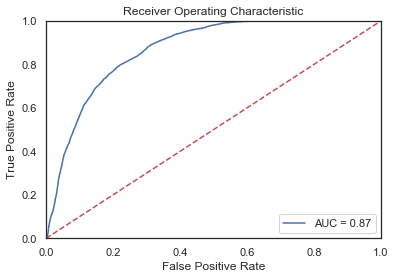

In [32]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred_proba[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Test Model on test data (not the real test data, but the test data from when I split the train into a train and test set)

## Compute the accuracy of the model when run on the test data

## Estimate whether or not a patient had a stroke, using the test data

In [33]:
y_test_pred = logit.predict(X_test)

## Estimate the probability of a patient having a stroke, using the test data

In [34]:
y_test_pred_proba = logit.predict_proba(X_test)

## Compute the accuracy

In [35]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.78


## Create a confusion matrix

In [36]:
print(confusion_matrix(y_test, y_test_pred))

[[6262 3770]
 [ 725 9321]]


## Compute Precision, Recall, F1-score, and Support

In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.74     10032
           1       0.71      0.93      0.81     10046

    accuracy                           0.78     20078
   macro avg       0.80      0.78      0.77     20078
weighted avg       0.80      0.78      0.77     20078



## Again, recall is 93%.

## Print the AUC-ROC.

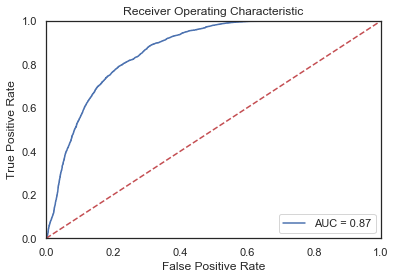

In [38]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred_proba[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# The real test data does not have a column for stroke because this was a contest. So I will add the predictions from my model onto the original cleaned data.

In [39]:
display(test_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1
1,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0
2,Female,14.0,0,0,No,children,Rural,95.16,21.2
3,Male,28.0,0,0,No,Private,Urban,94.76,23.4
4,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6
5,Female,66.0,1,0,Yes,Private,Urban,219.98,32.2
6,Female,49.0,0,0,Yes,Self-employed,Rural,74.03,25.1
7,Male,46.0,0,0,Yes,Govt_job,Urban,120.80,32.5
8,Female,75.0,0,0,Yes,Self-employed,Rural,78.71,28.0
9,Male,75.0,0,0,Yes,Self-employed,Urban,77.20,25.7


## Select the same four features used in train.

In [40]:
test_df = test_df[['age', 'heart_disease', 'hypertension', 'avg_glucose_level']]

## All of these features are numerical so I don't need to encode anything.

## Estimate whether or not a patient had a stroke, using the test data

In [41]:
y_pred = logit.predict(test_df)

In [42]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [43]:
test_df['prediction'] = y_pred
display(test_df)

,age,heart_disease,hypertension,avg_glucose_level,prediction
0,80.0,0,0,83.84,1
1,74.0,1,0,179.50,1
2,14.0,0,0,95.16,0
3,28.0,0,0,94.76,0
4,63.0,0,0,83.57,1
5,66.0,0,1,219.98,1
6,49.0,0,0,74.03,0
7,46.0,0,0,120.80,0
8,75.0,0,0,78.71,1
9,75.0,0,0,77.20,1


## But, of course, there is no way to test my recall on this data.